In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [4]:
dfp = pd.read_csv('data/city_hour.csv')
dfp.Datetime = pd.to_datetime(dfp.Datetime,format = '%d-%m-%Y %H:%M')
dfp.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
dft = pd.read_csv('data/temp_hour.csv')
#del dft['Unnamed: 0']
dft.Datetime = pd.to_datetime(dft.Datetime, format = '%d-%m-%Y %H:%M')
dft.head(5)

,City,Datetime,maxtempC,mintempC,sunHour,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2009-01-01 00:00:00,27,12,11.6,16,18,18,18,11,2,91,0.0,1014,14,10,109,8
1,Bengaluru,2009-01-01 01:00:00,27,12,11.6,16,17,17,17,9,2,93,0.0,1014,14,7,85,6
2,Bengaluru,2009-01-01 02:00:00,27,12,11.6,15,16,16,16,7,2,94,0.0,1014,13,5,61,4
3,Bengaluru,2009-01-01 03:00:00,27,12,11.6,15,15,15,15,5,2,96,0.0,1014,12,2,37,3
4,Bengaluru,2009-01-01 04:00:00,27,12,11.6,15,18,18,18,5,1,88,0.0,1015,14,5,45,3


In [18]:
df = dfp.merge(dft,on=['City','Datetime'])
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,...,20,14,65,91,0.0,1010,19,7,141,9
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,...,19,12,74,94,0.0,1010,19,5,149,8
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,...,19,10,83,97,0.0,1010,18,2,156,6
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,...,19,9,75,93,0.0,1011,19,5,156,7
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,...,20,9,66,90,0.0,1011,20,7,155,7


In [19]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'maxtempC', 'mintempC', 'sunHour', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph'],
      dtype='object')

In [20]:
city = ['Bengaluru', 'Delhi', 'Hyderabad', 'Jaipur', 'Mumbai']

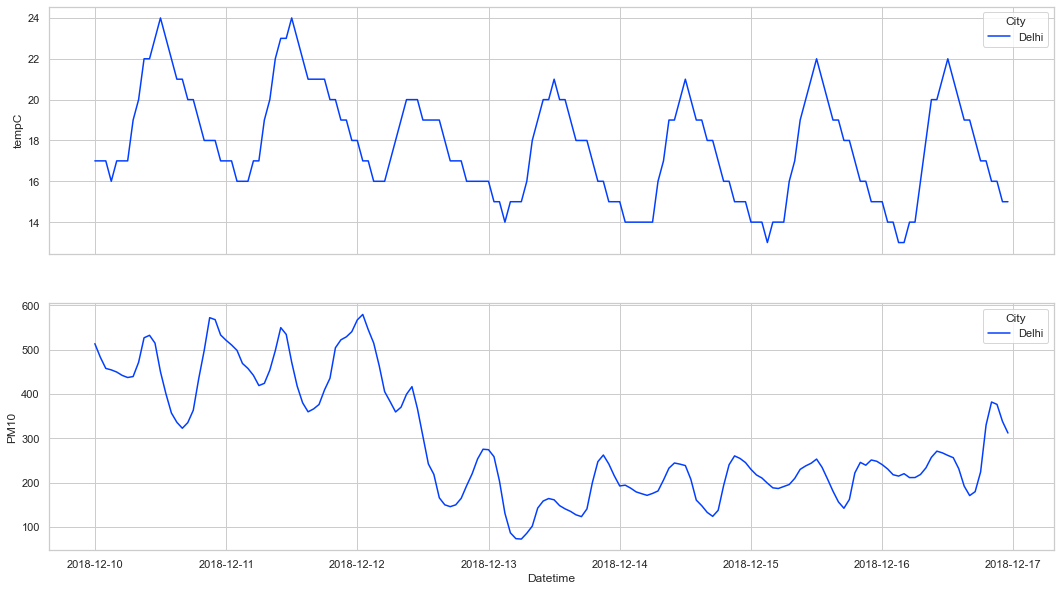

In [35]:
dc = df[df.City == 'Delhi']
dff = dc[(dc['Datetime'].dt.year == 2018) & (dc['Datetime'].dt.month == 12) & (dc['Datetime'].dt.week == 50)]
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (18,10),sharex=True)
sns.lineplot(dff['Datetime'],dff['tempC'],hue = dff['City'],ax=ax1)
sns.lineplot(dff['Datetime'],dff['PM10'],hue = dff['City'],ax=ax2)
plt.show()

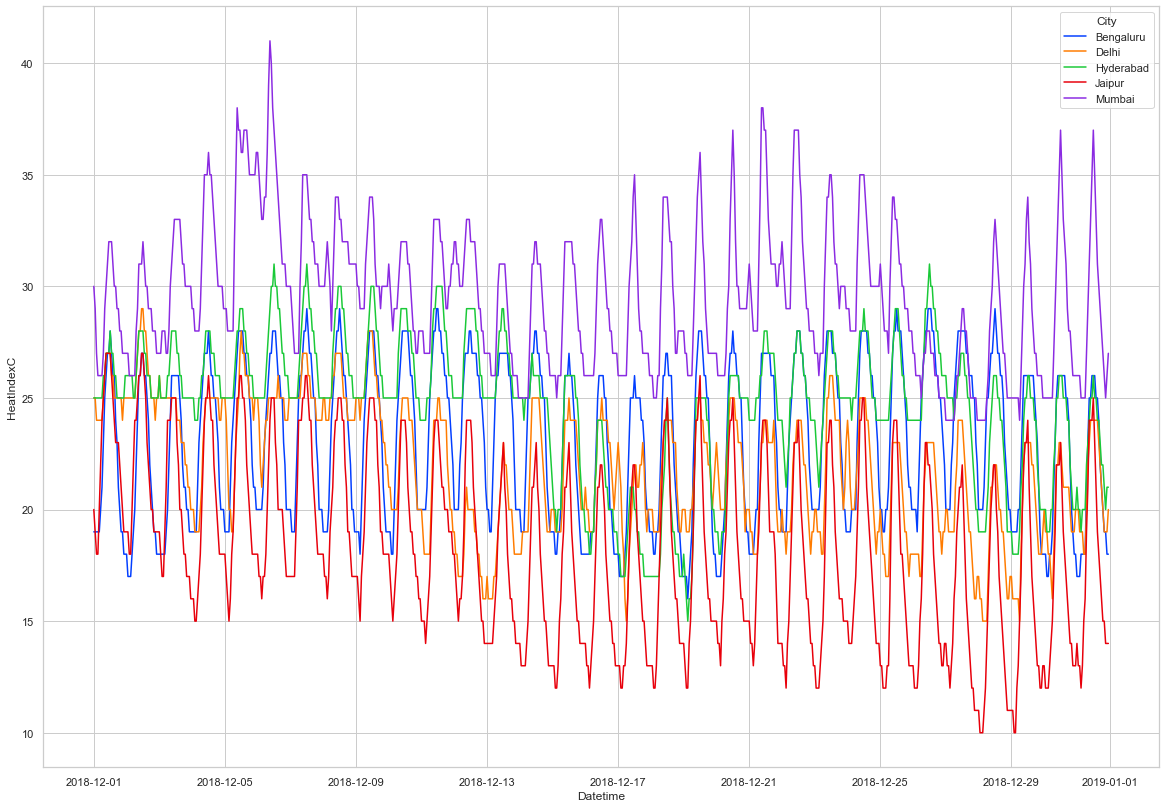